# Valores de funciones mediante regresiones no lineales

Se busca modelar una función mediante datos conocidos de esta a partir de algoritmos de regresión de Machine Learning.

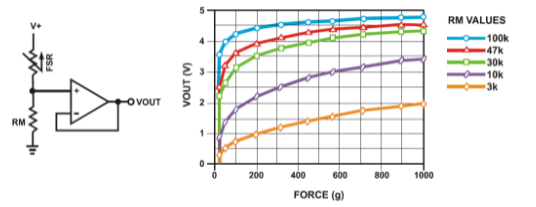

En nuestro caso buscamos modelar la función de color violeta, la cual corresponde a la resistencia RM de 10K ohm (la gráfica es tensión en funcion de fuerza en gramos). 

Pero a nosotros nos interesa que los valores obtenidos sean directamente en gramos, por lo que invertiremos los ejes ya que nosotros estaremos obteniendo un valor en voltaje a través del muestreo de Arduino.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Valores obtenidos a vista a partir de la gráfica

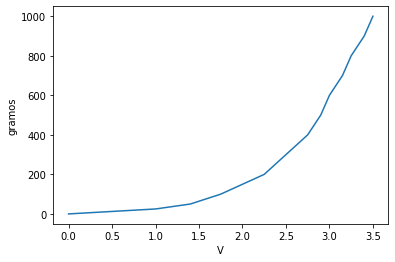

In [4]:
y = [a for a in range(0,1100,100)]
y.insert(1, 50)
y.insert(1, 25)
x = [0, 1, 1.4, 1.75, 2.25, 2.5, 2.75, 2.90, 3, 3.15, 3.25, 3.4, 3.5]

y = np.array(y)
x = np.array(x)

plt.xlabel('V')
plt.ylabel('gramos')
plt.plot(x, y)

Creación y entrenamiento de un Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
x= np.reshape(x,(-1,1))
y= np.reshape(y,(-1,1))

# from sklearn.compose import TransformedTargetRegressor
# RFlog = TransformedTargetRegressor(RF,
#                                   func = lambda x: x,
#                                   inverse_func = lambda x: np.clip(x, 0, 1000))

RF.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestRegressor()

Ahora nuestro RF modela nuestra función, veamos que valores nos arroja debido a entradas

In [10]:
valores = [0, 0.3, 0.5, 0.7, 1, 1.3, 1.6, 2, 2.3, 2.5, 2.7, 3, 3.2, 3.5]
predicciones = []

for valor in valores:
  valor = np.array(valor)
  valor = np.reshape(valor, (-1,1))
  predicciones.append(RF.predict(valor))

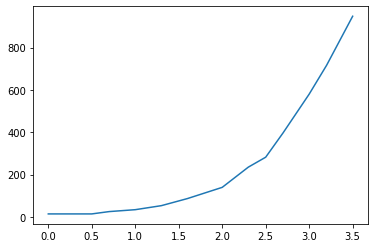

In [11]:
plt.plot(valores, predicciones)

Importamos nuestro modelo para utilizarlo en nuestro software

In [ ]:
import pickle

fichero = open('RFlog', 'wb')
pickle.dump(RF, fichero)
fichero.close()